In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
with open('data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

In [4]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [5]:
# label 1 = severe traffic jam / 0 = regular traffic
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [6]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


In [7]:
df.label.value_counts(normalize = True)

1    0.5
0    0.5
Name: label, dtype: float64

In [8]:
# get index of largest value
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

In [9]:
# view sequence of events in the largest event id
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [10]:
# find the length of sequence
maxlen = len(max_len_event.events)
maxlen

84

In [11]:
# assign each event into an index
key_dict = {}
for k, v in event_dict.items():
  key_dict[v] = k
key_dict

{'road closed due to construction': 1,
 'traffic jam': 2,
 'stopped car on the shoulder': 3,
 'road closed': 4,
 'other': 5,
 'object on roadway': 6,
 'major event': 7,
 'pothole': 8,
 'traffic heavier than normal': 9,
 'road construction': 10,
 'fog': 11,
 'accident': 12,
 'slowdown': 13,
 'stopped car': 14,
 'small traffic jam': 15,
 'stopped traffic': 16,
 'heavy traffic': 17,
 'minor accident': 18,
 'medium traffic jam': 19,
 'malfunctioning traffic light': 20,
 'missing sign on the shoulder': 21,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'large traffic jam': 24,
 'hazard on the shoulder': 25,
 'hazard on road': 26,
 'ice on roadway': 27,
 'weather hazard': 28,
 'flooding': 29,
 'road closed due to hazard': 30,
 'hail': 31,
 'huge traffic jam': 32}

In [12]:
# function to convert list of event name to event id
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = key_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [13]:
map_event_list_to_idxs(max_len_event.events)

[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

In [14]:
import numpy as np
from keras.utils import to_categorical

Using TensorFlow backend.


In [15]:
from keras.preprocessing.sequence import pad_sequences

In [16]:
# find the number of unique events
len(event_dict)

32

In [17]:
# replace sequence of events into a list of index
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

In [18]:
# save the result as a list of list
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

In [19]:
len(sequences)

1722

In [20]:
# make all list with the sam length
# insert 0 as padding
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]])

In [21]:
# save labels
labels = np.array(df.label)

In [22]:
# set random seed
np.random.seed(12)

In [23]:
# shuffle the sequences with labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [24]:
# split training to 80% and remaining as validation
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [25]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [26]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [27]:
# number of events = 32, but we have 33 after padding, we will add 1 to the length of event_dict
num_events = len(event_dict) + 1

In [28]:
# convert each number into 20 scalars
embedding_dim = 20

In [29]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [30]:
# build the model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# set weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          660       
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6784      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,477
Trainable params: 6,817
Non-trainable params: 660
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("m0.h5")

Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.6805 - acc: 0.5635 - val_loss: 0.6795 - val_acc: 0.5826
Epoch 2/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.6514 - acc: 0.6151 - val_loss: 0.6562 - val_acc: 0.6232
Epoch 3/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.6274 - acc: 0.6667 - val_loss: 0.6958 - val_acc: 0.5478
Epoch 4/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.6105 - acc: 0.6826 - val_loss: 0.7021 - val_acc: 0.5797
Epoch 5/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.5979 - acc: 0.6797 - val_loss: 0.7068 - val_acc: 0.5855
Epoch 6/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.5936 - acc: 0.6855 - val_loss: 0.6395 - val_acc: 0.6522
Epoch 7/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.5792 - acc: 0.7059 - val_loss: 0.6405 - val_acc: 0.6319
Epoch 8/50
1377

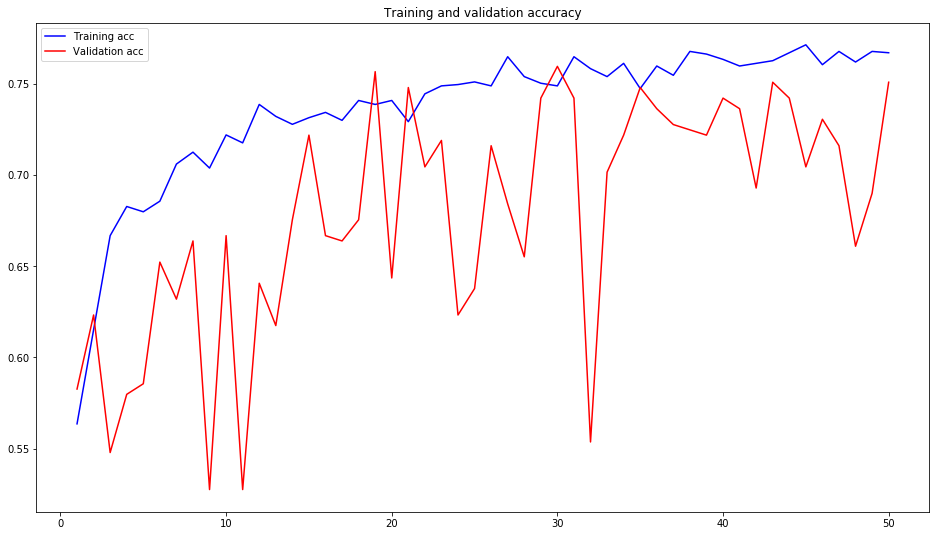

In [35]:
import matplotlib.pyplot as plt

# display all graphs using high-quality images
%matplotlib inline
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = {
 'pdf',
 'png'
}

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16,9))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend();

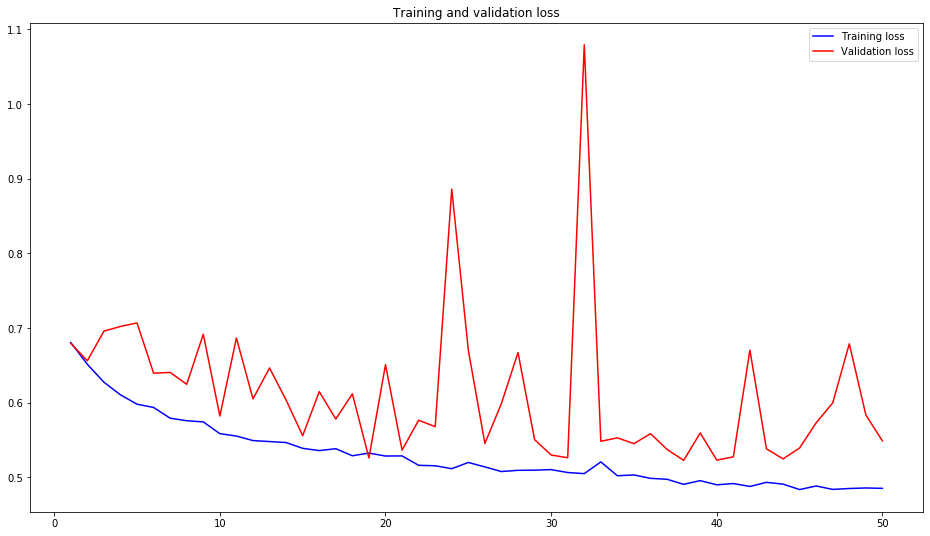

In [36]:
plt.figure(figsize=(16,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                6784      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 7,477
Trainable params: 7,477
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("m1.h5")

C:\Users\amir\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.6806 - acc: 0.5788 - val_loss: 0.6624 - val_acc: 0.6232
Epoch 2/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.6380 - acc: 0.6536 - val_loss: 0.6645 - val_acc: 0.5652
Epoch 3/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.6022 - acc: 0.6906 - val_loss: 0.7956 - val_acc: 0.5217
Epoch 4/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.5816 - acc: 0.7211 - val_loss: 0.5951 - val_acc: 0.6725
Epoch 5/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.5683 - acc: 0.7226 - val_loss: 0.5604 - val_acc: 0.7101
Epoch 6/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.5588 - acc: 0.7255 - val_loss: 0.5437 - val_acc: 0.7420
Epoch 7/50
1377/1377 [==============================] - 6s 4ms/step - loss: 0.5463 - acc: 0.7262 - val_loss: 0.5432 - val_acc: 0.7304
Epoch 8/50
1377

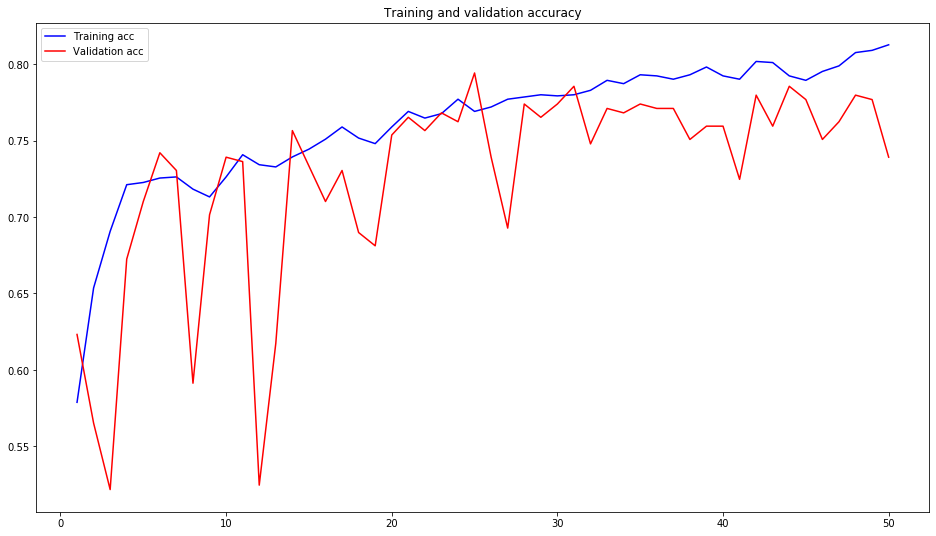

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16,9))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend();

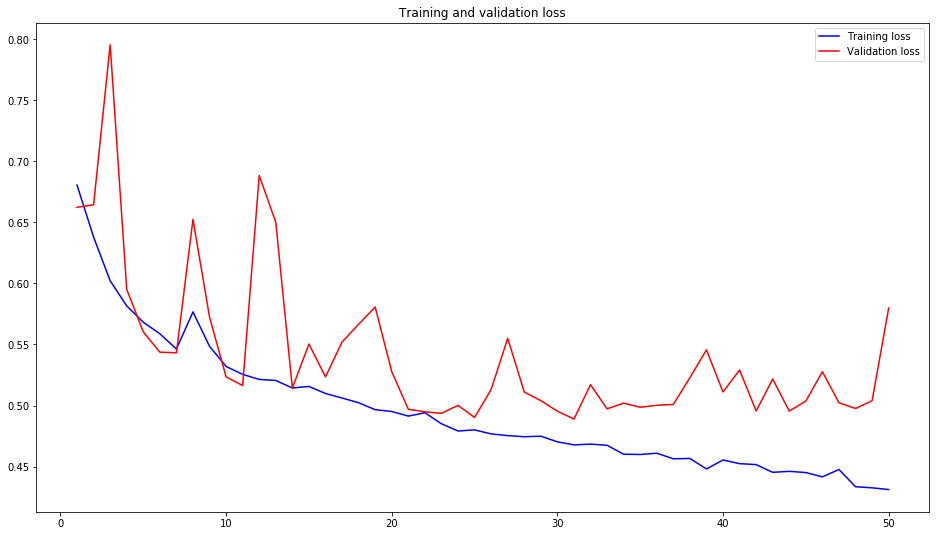

In [42]:
plt.figure(figsize=(16,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [46]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 20)          660       
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                6784      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 7,477
Trainable params: 7,477
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("m2.h5")

C:\Users\amir\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 6s 4ms/step - loss: 0.6782 - acc: 0.5723 - val_loss: 0.6603 - val_acc: 0.6348
Epoch 2/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.6630 - acc: 0.6064 - val_loss: 0.6468 - val_acc: 0.6638
Epoch 3/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.6377 - acc: 0.6405 - val_loss: 0.6404 - val_acc: 0.6174
Epoch 4/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.6209 - acc: 0.6594 - val_loss: 0.6419 - val_acc: 0.6261
Epoch 5/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.6152 - acc: 0.6601 - val_loss: 0.6101 - val_acc: 0.6319
Epoch 6/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.5978 - acc: 0.6703 - val_loss: 0.6037 - val_acc: 0.6522
Epoch 7/50
1377/1377 [==============================] - 5s 4ms/step - loss: 0.5919 - acc: 0.6790 - val_loss: 0.5924 - val_acc: 0.6725
Epoch 8/50
1377

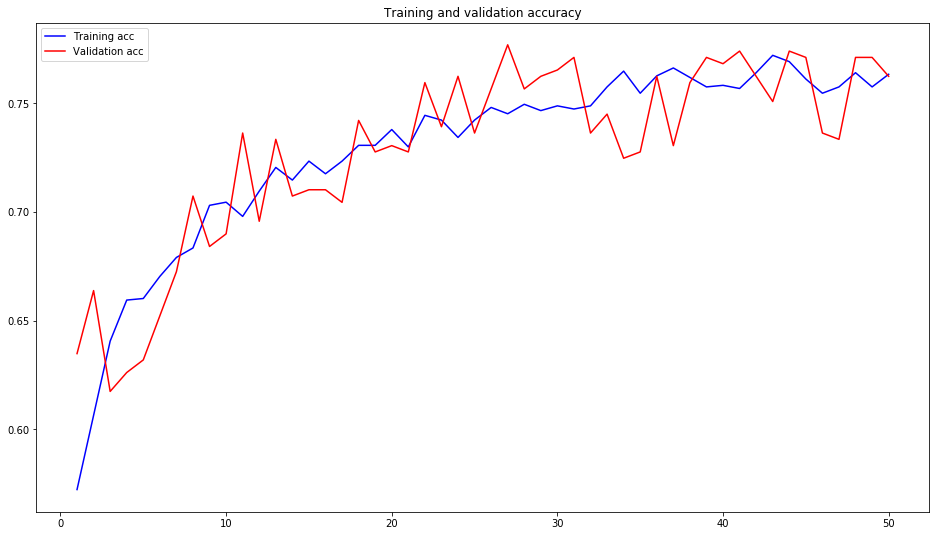

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16,9))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend();

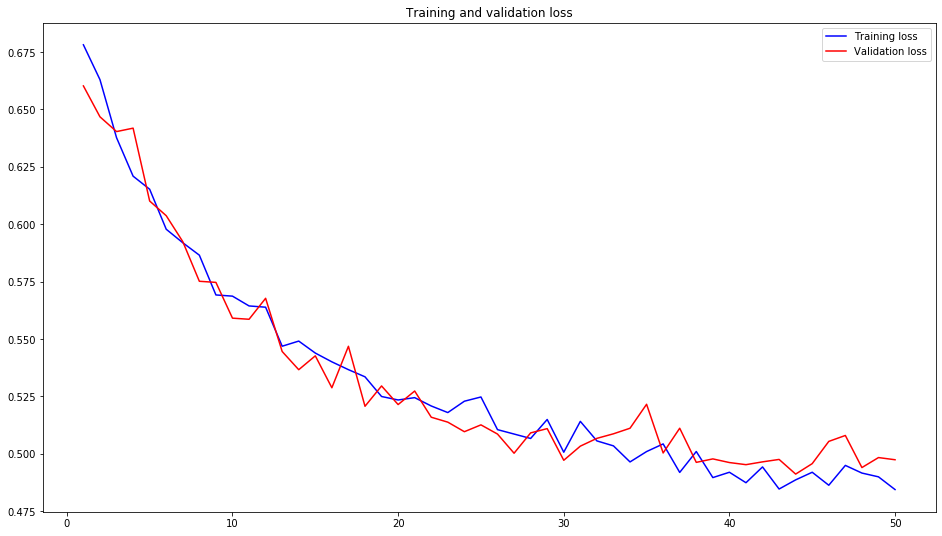

In [49]:
plt.figure(figsize=(16,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()